# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [179]:
from math import log10
import cmath as c
import numpy as np


def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000, m=1):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    xn = x0
    for i in range(maxiter):
        x_prev = xn
        xn = x_prev - m*f(x_prev)/fder(x_prev)
#        print(xn, m)
        if abs(xn-x_prev)/m < eps*abs(xn):
            break
    if m!=1:
        return (round(xn,int(log10((1/eps)+1))), i+1,m) 
    else:
        return (round(xn,int(log10((1/eps)+1))), i+1) 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [186]:
def func1(x):
    return x**2-1
def func1_der(x):
    return 2*x


starting_points = [(-1)**i*float(i) for i in range(10,30)]

x_min = [newton_iteration(func1, func1_der, x) for x in starting_points ]
for q in range(len(starting_points)):
    print("Starting from: ", starting_points[q], "; Solution, number of iterations", x_min[q])


Starting from:  10.0 ; Solution, number of iterations (1.0, 7)
Starting from:  -11.0 ; Solution, number of iterations (-1.0, 8)
Starting from:  12.0 ; Solution, number of iterations (1.0, 8)
Starting from:  -13.0 ; Solution, number of iterations (-1.0, 8)
Starting from:  14.0 ; Solution, number of iterations (1.0, 8)
Starting from:  -15.0 ; Solution, number of iterations (-1.0, 8)
Starting from:  16.0 ; Solution, number of iterations (1.0, 8)
Starting from:  -17.0 ; Solution, number of iterations (-1.0, 8)
Starting from:  18.0 ; Solution, number of iterations (1.0, 8)
Starting from:  -19.0 ; Solution, number of iterations (-1.0, 8)
Starting from:  20.0 ; Solution, number of iterations (1.0, 8)
Starting from:  -21.0 ; Solution, number of iterations (-1.0, 9)
Starting from:  22.0 ; Solution, number of iterations (1.0, 9)
Starting from:  -23.0 ; Solution, number of iterations (-1.0, 9)
Starting from:  24.0 ; Solution, number of iterations (1.0, 9)
Starting from:  -25.0 ; Solution, number 

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [203]:
def func2(x):
    return (x**2-1)**2
def func2_der(x):
    return 4*x*(-1+x**2)

x1_forfunc2 = 7.  
x2_forfunc2 = -15.
m = [i for i in range(1,6)]
x1_min = [newton_iteration(func2, func2_der, x1_forfunc2, m=coeff) for coeff in m ]
for j in range(2*len(m)):
    if j<=len(m)-1:
        print("Starting from", x1_forfunc2, "Solution, number of iterations, coefficient m:", newton_iteration(func2, func2_der, x1_forfunc2, m=m[j]))
    else:
        print("Starting from", x2_forfunc2, "Solution, number of iterations, coefficient m:", newton_iteration(func2, func2_der, x2_forfunc2, m=m[j-len(m)]))

Starting from 7.0 Solution, number of iterations, coefficient m: (1.00001, 23)
Starting from 7.0 Solution, number of iterations, coefficient m: (1.0, 7, 2)
Starting from 7.0 Solution, number of iterations, coefficient m: (0.99999, 16, 3)
Starting from 7.0 Solution, number of iterations, coefficient m: (7.0, 1000, 4)
Starting from 7.0 Solution, number of iterations, coefficient m: (-3.02427, 1000, 5)
Starting from -15.0 Solution, number of iterations, coefficient m: (-1.00001, 26)
Starting from -15.0 Solution, number of iterations, coefficient m: (-1.0, 8, 2)
Starting from -15.0 Solution, number of iterations, coefficient m: (-1.00001, 16, 3)
Starting from -15.0 Solution, number of iterations, coefficient m: (-15.0, 1000, 4)
Starting from -15.0 Solution, number of iterations, coefficient m: (1.36031, 1000, 5)


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Не знаю зачем, но вот решение и число итераций соответственно:  (0.6417143225927436, 363)


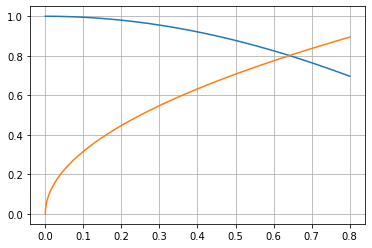

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import math as m


x = np.linspace(0,0.8,1000)
plt.plot(x, np.cos(x))
plt.plot(x, np.sqrt(x))
plt.grid(True)
def fixed_point_iter(f,x0, eps=1e-7, niter=int(1e5)):
    x_prev = x0
    for i in range(niter):
        x_curr = f(x_prev)
        if abs(x_prev-x_curr)<eps:
            break
        x_prev = x_curr
    return (x_curr, i)

print("Не знаю зачем, но вот решение и число итераций соответственно: ", fixed_point_iter(lambda x: 0.5*(1+m.cos(2*x)),0.1))
plt.show()

In [178]:
def modified_fixed_point_iter(f,x0, alpha, eps=1e-5, niter=int(1e5)):
    x_prev = x0
    for i in range(niter):
        x_curr = x_prev-alpha*( f(x_prev)) 
        if abs(x_prev-x_curr)<eps:
            break
        x_prev = x_curr
    return x_curr, i


alpha0 = 2.
alpha_special = 2/(1+m.sin(2*0.7)+1+m.sin(2*0.6))
for j in range(10):
    point, i= modified_fixed_point_iter(lambda y: y-0.5*(1+m.cos(2*y) ), 0.2, alpha0)
    print("Точка = ", point, "Число итераций = ", i, "alpha = ", alpha0)
    alpha0 /=1.5
point, i= modified_fixed_point_iter(lambda y: y-0.5*(1+m.cos(2*y) ), 0.2, alpha_special)
print("Точка = ", point, "Число итераций = ", i, "alpha_special = ", alpha_special)

Точка =  -1.571913008468601 Число итераций =  99999 alpha =  2.0
Точка =  -0.3375371828724596 Число итераций =  99999 alpha =  1.3333333333333333
Точка =  0.6417109445741079 Число итераций =  37 alpha =  0.8888888888888888
Точка =  0.6417133963723347 Число итераций =  5 alpha =  0.5925925925925926
Точка =  0.6417132933229468 Число итераций =  8 alpha =  0.3950617283950617
Точка =  0.6417093692013143 Число итераций =  15 alpha =  0.2633744855967078
Точка =  0.6417006413738162 Число итераций =  24 alpha =  0.1755829903978052
Точка =  0.6416814266372635 Число итераций =  36 alpha =  0.11705532693187014
Точка =  0.6416601013246023 Число итераций =  54 alpha =  0.07803688462124676
Точка =  0.6416325716949425 Число итераций =  80 alpha =  0.052024589747497844
Точка =  0.641714370869347 Число итераций =  3 alpha_special =  0.5105311320492162


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [110]:
x = np.linspace(-10,10,1000)
y = 1j*x
z = np.zeros(x.shape[0]**2)*(1+1j)
for i in range (y.shape[0]):
    z[i*y.shape[0]:(i+1)*y.shape[0]] = x+y[i]
xi = np.empty_like(z)
for w in range(z.shape[0]):
    z0 = z[w]
    xi[w]  = newton_iteration(lambda x:x**3-1,lambda x: 3*x**2, z0)[0]


In [204]:
kappa = np.empty_like(xi)
for i in range(z.shape[0]):
    kappa[i]=c.phase(xi[i])/(2*c.pi/3)
kappa = np.real(kappa)

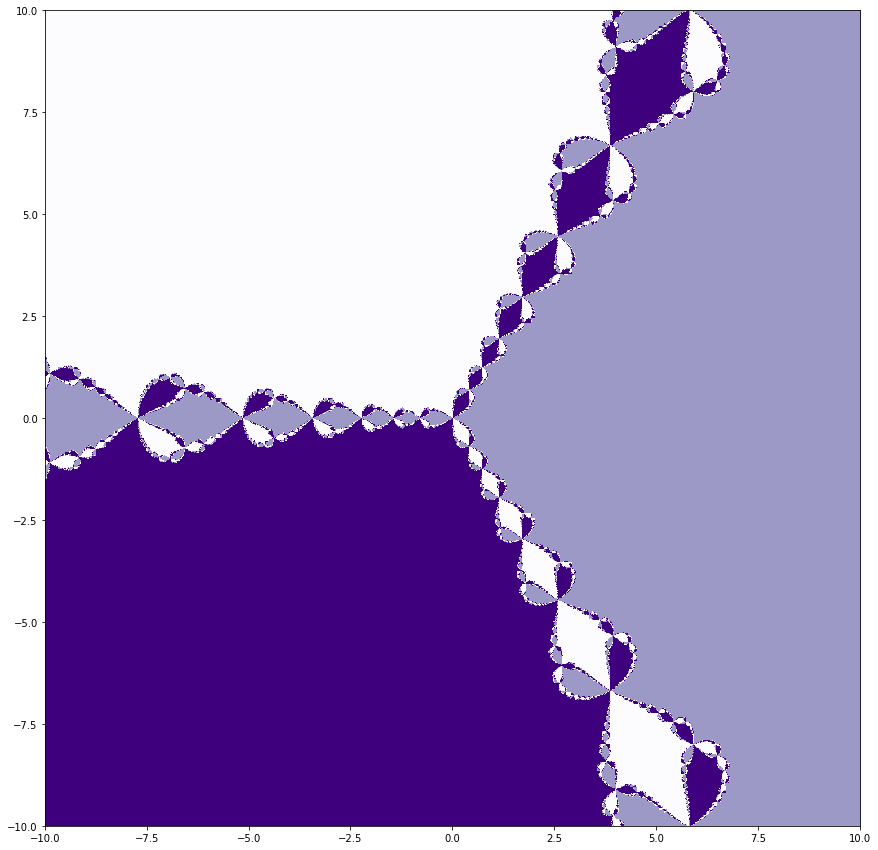

In [122]:
plt.figure(figsize = (15,15))
plt.imshow(kappa.reshape(x.shape[0],x.shape[0]), cmap='Purples', interpolation='nearest', extent=[-10,10,-10,10])
plt.show()

Общие замечания про эти все проверки методов по отношению с теорией:
Казалось бы, как неожидавнно, что математика работает и при нужных значениях коэффициентов мы получаем сходимость лучше, а при бездумном их выборе получаем расходимости